### Install / Import Libraries

In [ ]:
!pip install opendatasets -q

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import opendatasets as od

### Download data set.

In [ ]:
od.download('https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification')

Skipping, found downloaded files in "./cats-and-dogs-for-classification" (use force=True to force download)


### Load Data Sets

In [ ]:
BATCH_SIZE = 32                # Images per batch.
IMAGE_SIZE = (128,128)         # Image size in pixels.

In [ ]:
# File locations of train data and test data.
train_data_dir = '/content/cats-and-dogs-for-classification/cats_dogs/train'
test_data_dir = '/content/cats-and-dogs-for-classification/cats_dogs/test'

In [ ]:
# Split data to train and validation.

train_data = tf.keras.utils.image_dataset_from_directory(
                  train_data_dir,
                  batch_size = BATCH_SIZE,
                  image_size = IMAGE_SIZE,
                  seed = 42,
                  validation_split = 0.1,       # 10% data for validation.
                  subset = 'training'   )       # train_data is for 'training'


validation_data = tf.keras.utils.image_dataset_from_directory(
                      train_data_dir,
                      batch_size = BATCH_SIZE,
                      image_size = IMAGE_SIZE,
                      seed = 42,
                      validation_split = 0.1,         # 10% data for validation.
                      subset = 'validation'   )       # train_data is for 'validation'


test_data = tf.keras.utils.image_dataset_from_directory(
                  test_data_dir,
                  batch_size = BATCH_SIZE,
                  image_size = IMAGE_SIZE   )


Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

### Let's display somethings.

In [ ]:
batch1 = train_data.take(1)  # Take 1st batch of train data set.

for image_batch, label_batch in batch1:
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


In [ ]:
for image_batch, label_batch in train_data.take(3):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)
(32, 128, 128, 3)
(32,)
(32, 128, 128, 3)
(32,)


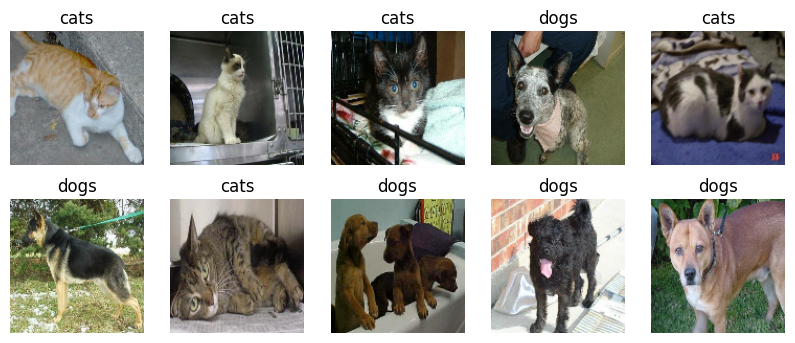

In [ ]:
# Plot data samples.

plt.figure(figsize=(10,4))                        # This line creates a new figure for the plot with a specified size of 10 inches in width and 4 inches in height.
for image,label in train_data.take(1):
  for i in range(10):                             # Iterates from 0 to 9, as you want to plot 10 images.
    ax = plt.subplot(2,5,i+1)                     # Creates a subplot in a 2x5 grid (2 rows and 5 columns) and selects the i+1-th subplot for the current iteration. The subplot index starts from 1.
    plt.imshow(image[i].numpy().astype('uint8'))  # 'image[i]' extracts the i-th image from the batch, and 'numpy()' converts it to a NumPy array, and 'astype('uint8')' ensures that the pixel values are of type unsigned 8-bit integers.
    plt.title(class_names[label[i]])              # 'label[i]' is the label (class index) of the current image, and 'class_names[label[i]]' maps it to the class name.
    plt.axis('off')

In [ ]:
for image,label in train_data.take(1):
  print(f'label[6] = {label[6]}')          # label[i] is the index in class_names list.
  print('\n')
  print(image[6])
  print(image[6].numpy().astype('uint8'))

label[6] = 1


tf.Tensor(
[[[134.81873  148.81873  112.818726]
  [108.22681  128.1449    82.44159 ]
  [114.47998  140.13232   87.58154 ]
  ...
  [136.       140.82782  105.14453 ]
  [135.23523  149.31335  106.04382 ]
  [142.96759  150.96759  109.96759 ]]

 [[108.3598   122.53949   86.26996 ]
  [131.43524  150.92798  105.4942  ]
  [113.69696  134.52509   86.69696 ]
  ...
  [125.76953  138.39392  100.27704 ]
  [125.70624  139.0539    98.51483 ]
  [143.12006  151.12006  112.120056]]

 [[ 88.95587  104.92743   67.76196 ]
  [116.48157  132.78235   92.92688 ]
  [ 95.30524  111.43805   68.74744 ]
  ...
  [ 93.81018  114.763306  73.77893 ]
  [105.532104 118.61444   80.30945 ]
  [135.64154  143.64154  106.61029 ]]

 ...

 [[174.03546  162.03546  138.03546 ]
  [187.79175  175.79175  151.79175 ]
  [188.61328  176.61328  152.61328 ]
  ...
  [190.48431  185.62573  157.95776 ]
  [194.41412  194.42975  160.42975 ]
  [166.86768  166.8833   132.8833  ]]

 [[185.0935   173.0935   149.0935  ]
  [191.3245

### Data preprocessing



##### Data Normalization

In [ ]:
for image, label in train_data.take(1):
  print(image[0])

tf.Tensor(
[[[ 85.07135   95.16901  118.6026  ]
  [ 73.450806  51.834015  96.53674 ]
  [ 77.49155   41.6745    96.203766]
  ...
  [141.32031  101.359375  84.67969 ]
  [139.01562  101.97656   85.97656 ]
  [136.       103.        86.      ]]

 [[ 91.555084 108.553894 115.95703 ]
  [ 86.658966  74.99762  104.00662 ]
  [ 74.58209   42.252106  91.69345 ]
  ...
  [140.66797  103.02734   85.34766 ]
  [141.31522  105.62143   88.58389 ]
  [139.30469  106.30469   88.609375]]

 [[ 94.50064  113.828766 114.16342 ]
  [ 93.45697   98.646454 109.95505 ]
  [ 79.53265   62.58133   97.458435]
  ...
  [140.50781  104.        85.75391 ]
  [138.49615  106.47272   85.48834 ]
  [139.       107.        85.50781 ]]

 ...

 [[207.2461   194.2461   188.2461  ]
  [207.7539   195.7539   183.73828 ]
  [206.67508  194.67508  180.67508 ]
  ...
  [206.48898  199.48898  191.48898 ]
  [206.29501  201.27939  195.27554 ]
  [202.08267  197.08267  192.57614 ]]

 [[205.76913  192.76913  186.76913 ]
  [209.00272  197.00272  1

In [ ]:
# Normalize feature values.
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/250,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [ ]:
for image, label in train_data.take(1):
  print(image[0])

tf.Tensor(
[[[0.26377553 0.21301365 0.11813726]
  [0.5353891  0.38347432 0.20359987]
  [0.5515419  0.38676974 0.19257022]
  ...
  [0.67971814 0.58952206 0.3934436 ]
  [0.6745098  0.58431375 0.3882353 ]
  [0.66332316 0.57312703 0.37704864]]

 [[0.23344655 0.18925542 0.15019915]
  [0.48180148 0.34551165 0.20767464]
  [0.5208326  0.37555075 0.18625896]
  ...
  [0.6862745  0.59607846 0.4       ]
  [0.67977345 0.5895774  0.39349893]
  [0.6684283  0.5782322  0.3821538 ]]

 [[0.22841606 0.19784008 0.19708419]
  [0.3618566  0.26410797 0.1702663 ]
  [0.44014892 0.315451   0.15907294]
  ...
  [0.6901961  0.6        0.40392157]
  [0.68235296 0.5921569  0.39607844]
  [0.66525733 0.57506126 0.37898284]]

 ...

 [[0.7563417  0.70143974 0.5092828 ]
  [0.7183206  0.66341865 0.47126177]
  [0.73020285 0.6753009  0.48314402]
  ...
  [0.4885723  0.440625   0.2917794 ]
  [0.52421874 0.47069523 0.32435638]
  [0.5433364  0.492356   0.3220641 ]]

 [[0.7295343  0.6746324  0.48253053]
  [0.7464341  0.69153214 0

##### Data Augmentation
Here we use a augmentation layer in network.

In [ ]:
#Create data augmentation layer.

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

In [ ]:
data_augmentation.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_1 (RandomR  (None, 128, 128, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_1 (RandomZoom)  (None, 128, 128, 3)       0         
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model Building

In [ ]:
model = tf.keras.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)      

##### Compile Model

In [ ]:
# Compile Model
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

##### Train Model

In [ ]:
start_time = time.time()

hostory = model.fit( train_data,
                     epochs = 3,
                     validation_data = validation_data )

end_time = time.time()

Epoch 1/3
225/225 [==============================] - 164s 727ms/step - loss: 0.6728 - accuracy: 0.5806 - val_loss: 0.7128 - val_accuracy: 0.5138
Epoch 2/3
225/225 [==============================] - 190s 844ms/step - loss: 0.6437 - accuracy: 0.6338 - val_loss: 0.6431 - val_accuracy: 0.6112
Epoch 3/3
225/225 [==============================] - 184s 818ms/step - loss: 0.6112 - accuracy: 0.6583 - val_loss: 0.6264 - val_accuracy: 0.6575


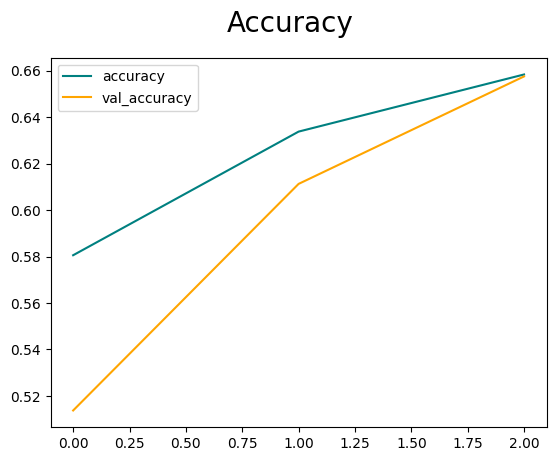

In [ ]:
fig = plt.figure()
plt.plot(hostory.history['accuracy'], color='teal', label='accuracy')
plt.plot(hostory.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

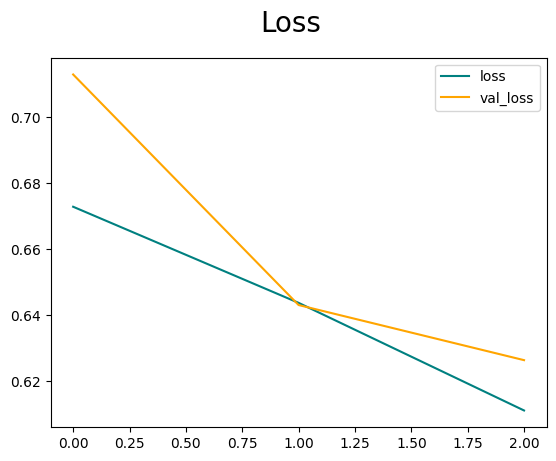

In [ ]:
fig = plt.figure()
plt.plot(hostory.history['loss'], color='teal', label='loss')
plt.plot(hostory.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
  x, y = batch
  yhat = model.predict(x)
  precision.update_state(y,yhat)
  recall.update_state(y,yhat)
  accuracy.update_state(y,yhat)

1/1 [==============================] - 0s 147ms/step


In [ ]:
print(x.shape)
print(y.shape)

(16, 128, 128, 3)
(16,)


In [ ]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6041056>

In [ ]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.824>

In [ ]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.642>

### Prediction Pipeline

In [ ]:
import cv2

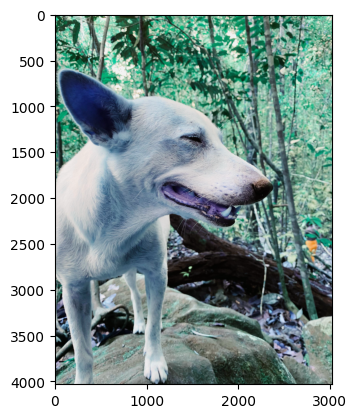

In [ ]:
image = cv2.imread('/content/Predict/dog.JPG')
plt.imshow(image)
plt.show()

In [ ]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255

In [ ]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.08443628, 0.28737745, 0.1452206 ],
        [0.03314951, 0.27947304, 0.14338236],
        [0.5778799 , 0.7778799 , 0.668076  ],
        ...,
        [0.78161764, 0.9228554 , 0.82604164],
        [0.36715686, 0.7028799 , 0.55582106],
        [0.44650736, 0.7550245 , 0.62941176]],

       [[0.22457108, 0.8303309 , 0.6365196 ],
        [0.01102941, 0.24754901, 0.10735294],
        [0.08676471, 0.3456495 , 0.22322305],
        ...,
        [0.88376224, 0.89865196, 0.8265319 ],
        [0.6181985 , 0.83976716, 0.78069854],
        [0.9791054 , 0.9606005 , 0.9012868 ]],

       [[0.46605393, 0.7050858 , 0.5878676 ],
        [0.07879902, 0.22242647, 0.12046569],
        [0.07169118, 0.21452206, 0.11930147],
        ...,
        [0.4632353 , 0.7592524 , 0.6259191 ],
        [0.5605392 , 0.7661152 , 0.6482843 ],
        [0.5425245 , 0.8327206 , 0.69289213]],

       ...,

       [[0.42714462, 0.5526348 , 0.53302693],
        [0.47

In [ ]:
scaled_image.shape

TensorShape([128, 128, 3])

In [ ]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

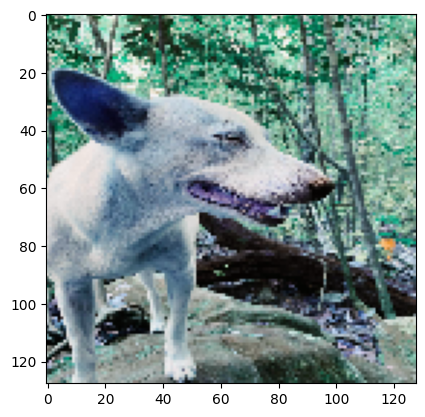

In [ ]:
plt.imshow(scaled_image)
plt.show()

In [ ]:
y_hat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 22ms/step


In [ ]:
print(y_hat)

[[0.8997909]]


In [ ]:
y_hat.shape

(1, 1)

In [ ]:
class_names

['cats', 'dogs']

In [ ]:
if y_hat >= 0.5:
  print(class_names[1])
else:
  print(class_names[0])

dogs
